<h1 align='center'> Genomes & Genetics </h1>
<h4 align='center'> Predict The Genetic Disorders </h4>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Introduction**

Genetic disorders occur when a problem in the baby’s chromosomes or genes causes physical abnormalities or illnesses.

In our body, we have millions of cells. In each cell, there are 46 chromosomes, found in 23 matching pairs. Half of the chromosomes are passed on from a person’s mother, and half from their father. These chromosomes carry our DNA, or genes, which are the instructions for how we look and how our body develops and functions. These instructions range from our eye color to our risk for disease.

When a harmful change occurs in these instructions, it can change the way a baby develops. Babies with genetic disorders can be at risk of slow mental and physical development, physical abnormalities, and lifelong illnesses.

Some genetic disorders are hereditary, meaning the genetic change is passed on from their parents. Other genetic changes can happen for the first time in the baby. Parents can carry a change in a gene or a chromosome without realizing it, as it may not cause them any health problems.

> ### Risk Factors for Genetic Disorders
Factors that increase your risk of having a baby with a genetic disorder include:
- Family history of a genetic disorder.
- Prior child with a genetic disorder.
- One parent has a chromosomal abnormality.
- Advanced maternal age (35 or older).
- Advanced paternal age (40 or older).
- Multiple miscarriages or prior stillbirth.
- Prenatal exposure to Drugs, Alcohol, or other Environmental Factors.

**Reference**: https://women.texaschildrens.org/program/high-risk-pregnancy-care/conditions/genetic-disorders

## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [3]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('ggplot')

## Statistical Analysis
from scipy import stats
from scipy.stats import norm,skew

# Display all Columns
pd.set_option('display.max_columns', None)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Loading the required Data

> I have kept my data in a folder called "dataset".

In [4]:
# Import the train and test data.
train = pd.read_csv('/content/drive/MyDrive/Genetic_Disorder/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Genetic_Disorder/dataset/test.csv')

In [5]:
# Viewing the train dataset
train.head(3)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [6]:
print("Dimensionality of the train dataset: ", train.shape)

Dimensionality of the train dataset:  (22083, 45)


### All the Lifrcycle in A Data Science Project

1. **Data Analysis / Data Preprocessing**
2. **Feature Engineering**
3. **Feature Selection**
4. **Model Building**
5. **Model Deployment**

## 2. Exploratory Data Analysis

**PROBLEM:** To predict the genetic disorders based on the information provided in the test dataset.

In [7]:
train.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
## Information of the train Dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

### Missing Values

- In any dataset we will initially try to find out where the missing data are. 

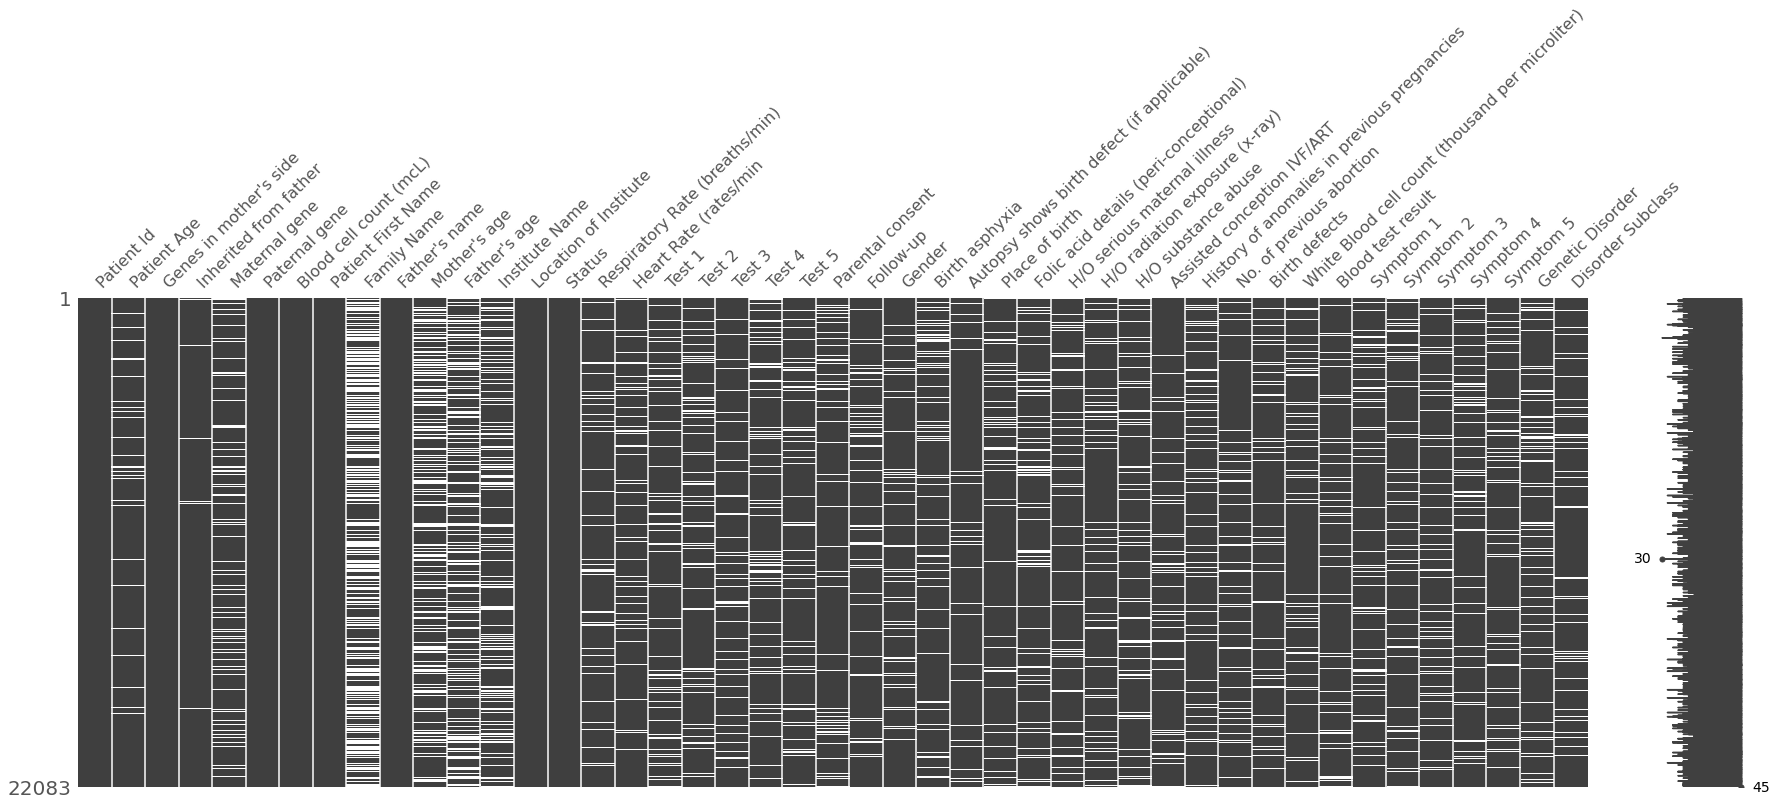

In [9]:
# To plot a graphic of missing values
missingno.matrix(train,figsize=(30,9))

- It is important to visualise missing values, because then you will know what are the major NaN values in your dataset.
- Here we can see that our columns have quite a few missing values.

In [10]:
# Understanding more about the missing value columns

def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()

    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1) 

    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(train)

Your selected dataset has 45 columns and 22083 observations.

 There are 37 columns that have missing values.


,Missing Values,% of Total Values
Family Name,9691,43.9
Mother's age,6036,27.3
Father's age,5986,27.1
Institute Name,5106,23.1
Maternal gene,2810,12.7
Symptom 2,2222,10.1
H/O substance abuse,2195,9.9
Gender,2173,9.8
History of anomalies in previous pregnancies,2172,9.8
Test 5,2170,9.8


### What Datatypes are there in the dataframe?

We usually consider features with a datatype of object as categorical features. And those with float or int could be numerical features.

However, sometimes the features that we consider as numerical might actually turn out to be categorical.

The next few steps will help us figure out how to process our data so our machine learning model can learn from it.
Ideally all the features will be encoded into a numerical value of some kind (maybe 0 or 1 / something else).

In [11]:
# Datatypes in the dataset
train.dtypes

Patient Id                                           object
Patient Age                                         float64
Genes in mother's side                               object
Inherited from father                                object
Maternal gene                                        object
Paternal gene                                        object
Blood cell count (mcL)                              float64
Patient First Name                                   object
Family Name                                          object
Father's name                                        object
Mother's age                                        float64
Father's age                                        float64
Institute Name                                       object
Location of Institute                                object
Status                                               object
Respiratory Rate (breaths/min)                       object
Heart Rate (rates/min                   

### Exploring each of these features 
We will go through each of the columns and see which all we can use in our first models. Some of them needs more preprocessing than the others to get ready.

In [12]:
train.head(3)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


#### FEATURE 0: Patient ID
Description: Represents the unique Identification Number of a Patient.

In [13]:
## Checking For Duplicates
train['Patient Id'].duplicated().any()

False

#### FEATURE 1: Patient Age
Description: Represents the Age of a Patient.

In [14]:
## Basic Statistics
train['Patient Age'].describe()

count    20656.000000
mean         6.974148
std          4.319475
min          0.000000
25%          3.000000
50%          7.000000
75%         11.000000
max         14.000000
Name: Patient Age, dtype: float64

In [15]:
## Missing Values
train['Patient Age'].isnull().any()

True

- We will be dealing with these missing values in the later stages.

#### FEATURE 2: Genes in Mother's Side
Description: Represents a Gene Defect in a Patient's Mother.

In [16]:
## Unique Categories
train["Genes in mother's side"].unique()

array(['Yes', 'No'], dtype=object)

Yes    13143
No      8940
Name: Genes in mother's side, dtype: int64


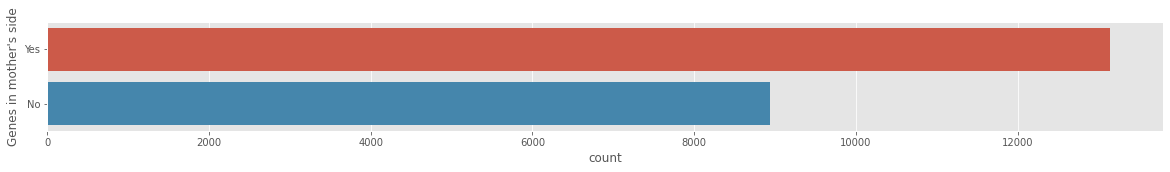

In [17]:
# Is there any Gene Defect in the Mother?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Genes in mother's side",data= train)
#sns.countplot(x= "Genes in mother's side",data= train)             --> You can use this to get a vertical graph.

print(train["Genes in mother's side"].value_counts())             ##This will help us see the exact number along with the graph.

- We can concur that most of the Patients Mother did have some Genetic Defect.

#### FEATURE 3: Inherited from Father
Description: Represents a Gene Defect in a Patient's Father.

In [18]:
## Unique Categories
train["Inherited from father"].unique()

array(['No', 'Yes', nan], dtype=object)

No     13133
Yes     8644
Name: Inherited from father, dtype: int64


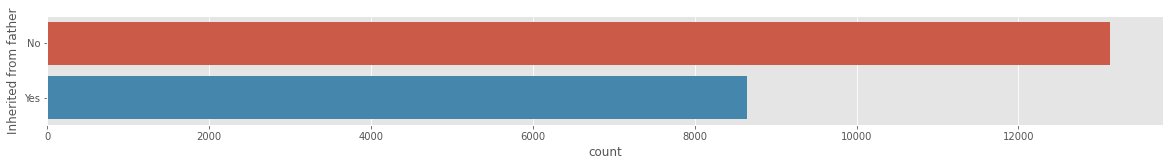

In [19]:
# Is there any Gene Defect in the Father?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Inherited from father",data= train)

print(train["Inherited from father"].value_counts())

#### FEATURE 4: Maternal Gene
Description: Represents a Gene defect in the Patient's Maternal side of the Family.

In [20]:
## Unique Categories
train["Maternal gene"].unique()

array(['Yes', 'No', nan], dtype=object)

Yes    10647
No      8626
Name: Maternal gene, dtype: int64


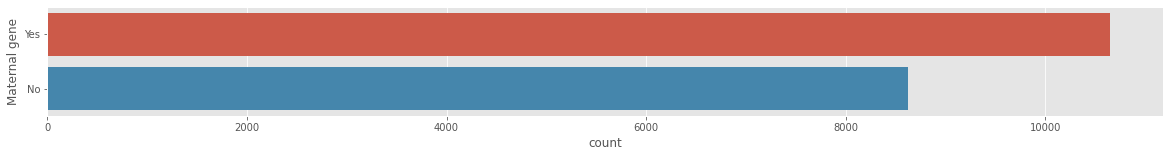

In [21]:
# Is there any Gene Defect in the Mothers Side?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Maternal gene",data= train)

print(train["Maternal gene"].value_counts())

#### FEATURE 5: Paternal Gene
Description: Represents a Gene defect in the Patient's Paternal side of the Family.

In [22]:
## Unique Categories
train["Paternal gene"].unique()

array(['No', 'Yes'], dtype=object)

No     12508
Yes     9575
Name: Paternal gene, dtype: int64


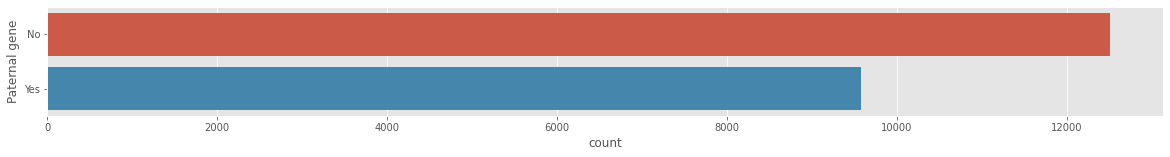

In [23]:
# Is there any Gene Defect in the Fathers Side?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Paternal gene",data= train)

print(train["Paternal gene"].value_counts())

- From this it is useful to see that most of the patients did not recieve any Gene defect from their Fathers Side.

- After viewing the above 4 columns we can come up with a solution to deal with missing values in the Feature Engineering Section.
  - *All the Missing Values in the **Inherited from father** Column can be dealt using the **Paternal gene** Column*.
  - *All the Missing Values in the **Maternal gene** Column can be dealt using the values in the **Genes in mother's side** Column*.

#### FEATURE 6: Blood Cell Count (mcL)
Description: Represents the Blood Cell Count of a Patient.

In [24]:
## Basic Statistics
train['Blood cell count (mcL)'].describe()

count    22083.000000
mean         4.898871
std          0.199663
min          4.092727
25%          4.763109
50%          4.899399
75%          5.033830
max          5.609829
Name: Blood cell count (mcL), dtype: float64

In [25]:
## Missing Values
train['Blood cell count (mcL)'].isnull().any()

False

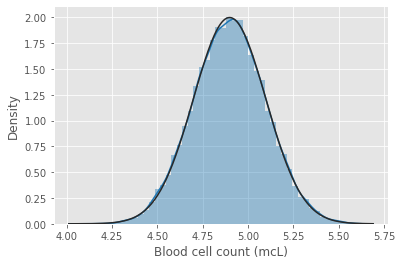

In [26]:
## Distribution of the Feature
sns.distplot(train['Blood cell count (mcL)'], fit= norm, color= 'tab:blue') 

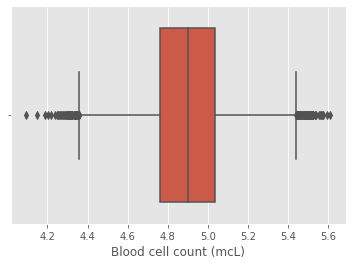

In [27]:
## Checking For Outliers
sns.boxplot(x= train['Blood cell count (mcL)'])

- Since we can see that there are outliers we can deal with them using the Z-Score Method.

> We will not be going into the following Columns as they seem irrelavant for our Analysis.
- Patient First Name
- Family Name
- Father's name
- Institute Name
- Location of Institute

#### FEATURE 7: Mother's age
Description: Represents a Patient's Mother's Age.

In [28]:
## Missing Values
train["Mother's age"].isnull().any()

True

In [29]:
## Basic Statistics
train["Mother's age"].describe()

count    16047.000000
mean        34.526454
std          9.852598
min         18.000000
25%         26.000000
50%         35.000000
75%         43.000000
max         51.000000
Name: Mother's age, dtype: float64

#### FEATURE 8: Father's age
Description: Represents a Patient's Father's Age.

In [30]:
## Missing Values
train["Father's age"].isnull().any()

True

In [31]:
## Basic Statistics
train["Father's age"].describe()

count    16097.000000
mean        41.972852
std         13.035501
min         20.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         64.000000
Name: Father's age, dtype: float64

- We can fill the Missing Values of the above two Columns by imputing their respective Mean Ages.

#### FEATURE 9: Status
Description: Represents whether a Patient is Deceased.

In [32]:
## Unique Categories
train["Status"].unique()

array(['Alive', 'Deceased'], dtype=object)

Alive       11083
Deceased    11000
Name: Status, dtype: int64


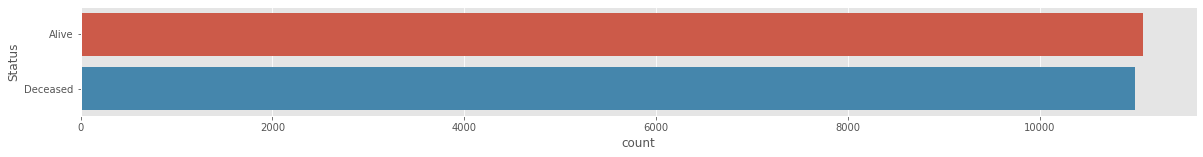

In [33]:
# Understanding the Status of Patients
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Status",data= train)

print(train["Status"].value_counts())

- We can see that there is not much difference in the count of the Status of Patients Registered.

#### FEATURE 10: Respiratory Rate (breaths/min)
Description: Represents a Patient's Respiratory Breathing Rate.

In [34]:
## Unique Categories
train["Respiratory Rate (breaths/min)"].unique()

array(['Normal (30-60)', 'Tachypnea', nan], dtype=object)

Normal (30-60)    10065
Tachypnea          9869
Name: Respiratory Rate (breaths/min), dtype: int64


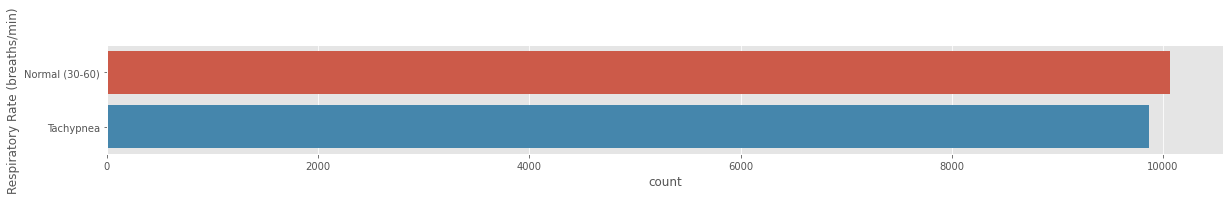

In [35]:
# Understanding the Respiratory Rate of Patients
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Respiratory Rate (breaths/min)",data= train)

print(train["Respiratory Rate (breaths/min)"].value_counts())

#### FEATURE 11: Heart Rate (rates/min)
Description: Represents a Patient's Heart Rate.

In [36]:
## Unique Categories
train["Heart Rate (rates/min"].unique()

array(['Normal', 'Tachycardia', nan], dtype=object)

Normal         10187
Tachycardia     9783
Name: Heart Rate (rates/min, dtype: int64


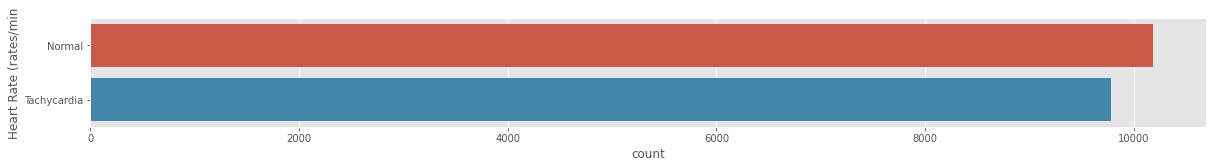

In [37]:
# Understanding the Heart Rate of Patients
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Heart Rate (rates/min",data= train)

print(train["Heart Rate (rates/min"].value_counts())

- After understanding the above 3 columns we have come up with a solution to deal with missing values in the future Section.
  - *All the Missing Values in the **Respiratory Rate** Column can be dealt using the **Status** Column*.
  - *All the Missing Values in the **Heart Rate** Column can be dealt using the values in the **Respiratory Rate** Column*.

#### FEATURE 12: Test 1 - Test 5
Description: Represents different Tests that were Conducted on a Patient.

In [38]:
print(f"Uniqueness for Test 1 is: {train['Test 1'].unique()}")
print()
print(f"Uniqueness for Test 2 is: {train['Test 2'].unique()}")
print()
print(f"Uniqueness for Test 3 is: {train['Test 3'].unique()}")
print()
print(f"Uniqueness for Test 4 is: {train['Test 4'].unique()}")
print()
print(f"Uniqueness for Test 5 is: {train['Test 5'].unique()}")

Uniqueness for Test 1 is: [ 0. nan]

Uniqueness for Test 2 is: [nan  0.]

Uniqueness for Test 3 is: [nan  0.]

Uniqueness for Test 4 is: [ 1. nan]

Uniqueness for Test 5 is: [ 0. nan]


In [39]:
print(f"Count for Test 1 is: {train['Test 1'].value_counts()}")
print()
print(f"Count for Test 2 is: {train['Test 2'].value_counts()}")
print()
print(f"Count for Test 3 is: {train['Test 3'].value_counts()}")
print()
print(f"Count for Test 4 is: {train['Test 4'].value_counts()}")
print()
print(f"Count for Test 5 is: {train['Test 5'].value_counts()}")

Count for Test 1 is: 0.0    19956
Name: Test 1, dtype: int64

Count for Test 2 is: 0.0    19931
Name: Test 2, dtype: int64

Count for Test 3 is: 0.0    19936
Name: Test 3, dtype: int64

Count for Test 4 is: 1.0    19943
Name: Test 4, dtype: int64

Count for Test 5 is: 0.0    19913
Name: Test 5, dtype: int64


- We can see here that the count of the values present is somewhat similar. So in that case we can fill in the missing values using the **Alternate** answer (i.e. *If we have 0 then we fill the Nan values with 1*)

#### FEATURE 13: Parental consent
Description: Represents Whether a Patient's Parents Approved the Treatment Plan.

In [40]:
## Unique Categories
train["Parental consent"].unique()

array(['Yes', nan], dtype=object)

In [41]:
## Count of Categories
train["Parental consent"].value_counts()

Yes    19958
Name: Parental consent, dtype: int64

- Similar to the Tests Column in this case also we can fill in the missing values using the **Alternate** answer (i.e. *If we have Yes then we fill the Nan values with No*)

#### FEATURE 14: Follow-up
Description: Represents a Patient's Level of Risk.

In [42]:
## Unique Categories
train["Follow-up"].unique()

array(['High', 'Low', nan], dtype=object)

Low     10040
High     9877
Name: Follow-up, dtype: int64


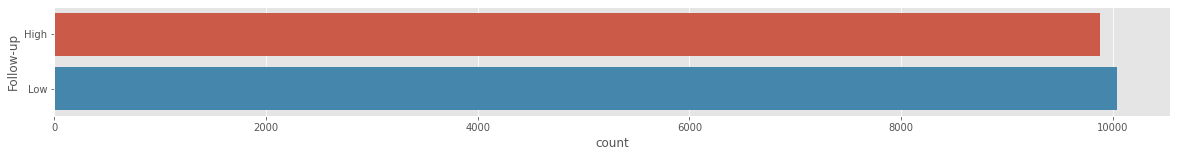

In [43]:
# Understanding the Risk Cases
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Follow-up",data= train)

print(train["Follow-up"].value_counts())

- We will try to deal with the missing values by comparing with the Respiratory and Heart Rate of the Patient.
  - If the Patient has either **Tachypnea** or **Tachycardia** then there is a ***High Level of Risk***.

#### FEATURE 15: Gender
Description: Represents a Patient's Gender.

In [44]:
## Unique Categories
train["Gender"].unique()

array([nan, 'Male', 'Female', 'Ambiguous'], dtype=object)

Ambiguous    6695
Male         6666
Female       6549
Name: Gender, dtype: int64


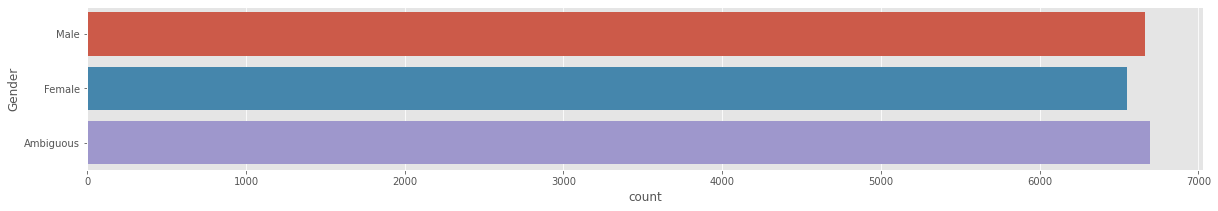

In [45]:
# Understanding the Gender distribution
fig = plt.figure(figsize=(20,3))
sns.countplot(y= "Gender",data= train)

print(train["Gender"].value_counts())

- There are multiple ways to deal with this issue. However we will go with the simplest methode --> **Fill using Most Frequent Category**. 

#### FEATURE 16: Birth asphyxia
Description: Represents whether a Patient Suffered from Birth Asphyxia.

In [46]:
## Unique Categories
train["Birth asphyxia"].unique()

array([nan, 'No', 'No record', 'Not available', 'Yes'], dtype=object)

Yes              5106
No record        5008
Not available    4986
No               4844
Name: Birth asphyxia, dtype: int64


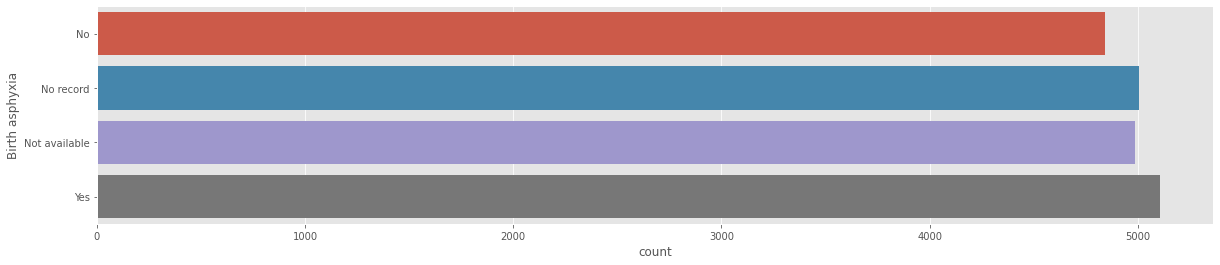

In [47]:
# Understanding Birth asphyxia distribution
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Birth asphyxia",data= train)

print(train["Birth asphyxia"].value_counts())

- When in Feature Engineering we will be considering the *No Record* category as *Not available*. 
- As for missing values we will be filling the values based on the Respiratory Rate. 

  - This is because --> **Asphyxia** - *a condition arising when the body is deprived of oxygen*

#### FEATURE 17: Autopsy shows Birth Defect
Description: Represents whether a Patient's Autopsy showed any Birth Defects.

In [48]:
## Unique Categories
train["Autopsy shows birth defect (if applicable)"].unique()

array(['Not applicable', 'None', 'No', 'Yes', nan], dtype=object)

Not applicable    11083
Yes                3383
None               3366
No                 3225
Name: Autopsy shows birth defect (if applicable), dtype: int64


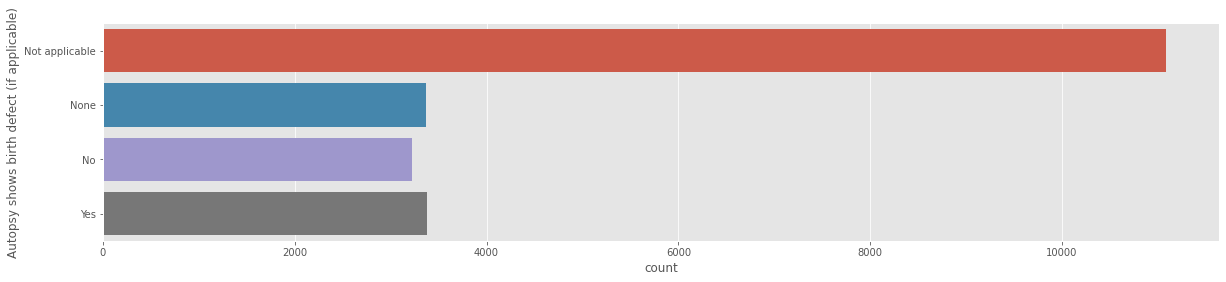

In [49]:
# Understanding Birth defect distribution
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Autopsy shows birth defect (if applicable)",data= train)

print(train["Autopsy shows birth defect (if applicable)"].value_counts())

In [50]:
## Checking the Status of Patients with Missing Autopsy Reports
X = train[train["Autopsy shows birth defect (if applicable)"].isnull() == True]
X['Status'].value_counts()

Deceased    1026
Name: Status, dtype: int64

- Since all of our Missing values are Deceased Patients we can rule out the possibility of **Not applicable**. 
- In order to fill these missing values while Feature Engineering, we will be using the *Inherited from father* Column. 

> We will not be using the **Place of birth**, **H/O serious maternal illness** and **History of anomalies in previous pregnancies** Columns as they are not relavant for our Analysis.
- ***H/O serious maternal illness***
  - Represents unexpected outcome of labor and delivery that resulted in significant short or long-term consequences to a patient's mother. 

**This will not lead to any genetical disorder in the patient.**

#### FEATURE 18: Folic acid details (peri-conceptional)
Description: Represents the Peri-Conceptional Folic Acid Supplementation Details of a Patient.

**Reference**: https://www.who.int/elena/titles/folate_periconceptional/en/

In [51]:
## Unique Categories
train["Folic acid details (peri-conceptional)"].unique()

array(['No', 'Yes', nan], dtype=object)

Yes    10087
No      9879
Name: Folic acid details (peri-conceptional), dtype: int64


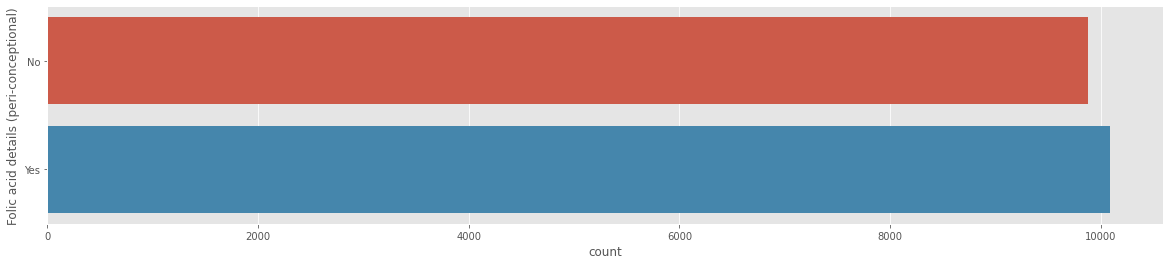

In [52]:
# Understanding Folic acid details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Folic acid details (peri-conceptional)",data= train)

print(train["Folic acid details (peri-conceptional)"].value_counts())

- Here we can fill in the missing values by considering them to be **No**.

#### FEATURE 19: H/O radiation exposure (x-ray)
Description: Represents whether a Patient has any Radiation Exposure history.

In [53]:
## Unique Categories
train["H/O radiation exposure (x-ray)"].unique()

array(['No', 'Not applicable', 'Yes', '-', nan], dtype=object)

Not applicable    5029
No                5005
Yes               4980
-                 4916
Name: H/O radiation exposure (x-ray), dtype: int64


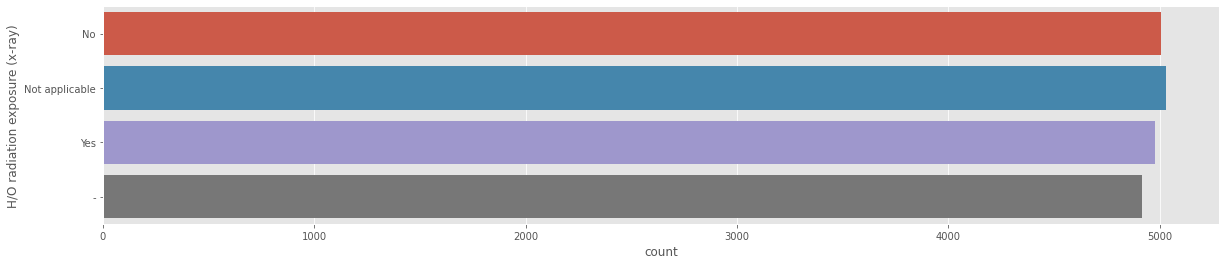

In [54]:
# Understanding Radiation Exposure details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "H/O radiation exposure (x-ray)",data= train)

print(train["H/O radiation exposure (x-ray)"].value_counts())

#### FEATURE 20: H/O substance abuse
Description: Represents whether a Parent has a history of Drug Addiction.

*Research into the role of genes in drug addiction has shown that natural variations in proteins—which are encoded by a person's genes—can lead to differences in how vulnerable that person is to drugs of abuse.* - http://headsup.scholastic.com/students/the-role-of-genes-in-drug-addiction

In [55]:
## Unique Categories
train["H/O substance abuse"].unique()

array(['No', 'Not applicable', nan, '-', 'Yes'], dtype=object)

-                 5042
No                5033
Yes               4975
Not applicable    4838
Name: H/O substance abuse, dtype: int64


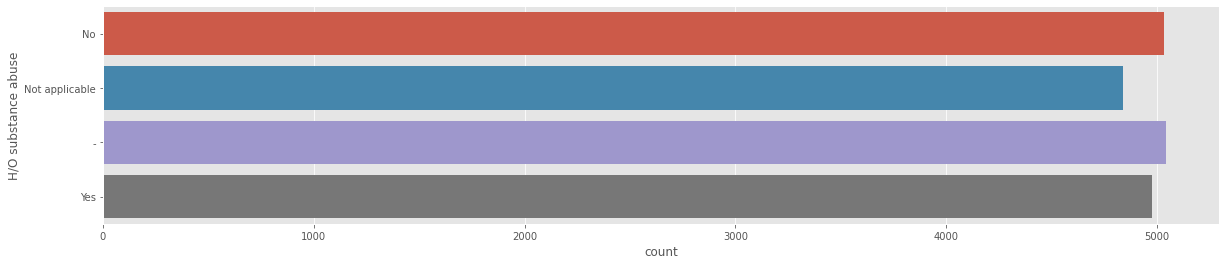

In [56]:
# Understanding Substance Abuse details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "H/O substance abuse",data= train)

print(train["H/O substance abuse"].value_counts())

> From the previous two columns we can conclude that:-
- **-** can be considered as **No**. So we will be replacing that in the future.
- The missing values can be considered and be filled with **Not applicable**.

#### FEATURE 21: Assisted conception IVF/ART
Description: Represents the Type of Treatment used for Infertility.

In [57]:
## Unique Categories
train["Assisted conception IVF/ART"].unique()

array(['No', 'Yes', nan], dtype=object)

Yes    10012
No      9949
Name: Assisted conception IVF/ART, dtype: int64


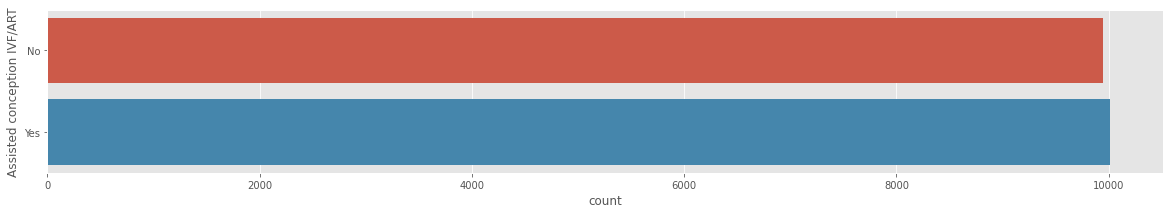

In [58]:
# Understanding Assisted Conception details
fig = plt.figure(figsize=(20,3))
sns.countplot(y= "Assisted conception IVF/ART",data= train)

print(train["Assisted conception IVF/ART"].value_counts())

- We will deal with the Missing Values during the Feature Engineering phase with correspondance with the *Folic acid details* Column.

**REFERENCE**:  https://carefertility.com.au/resources/blog/what-do-you-and-your-partner-need-to-do-before-ivf-treatment

#### FEATURE 22: History of anomalies in previous pregnancies
Description: Represents whether the Mother had any Anomalies in her Previous Pregnancies.

In [59]:
## Unique Categories
train["History of anomalies in previous pregnancies"].unique()

array(['Yes', 'No', nan], dtype=object)

Yes    10082
No      9829
Name: History of anomalies in previous pregnancies, dtype: int64


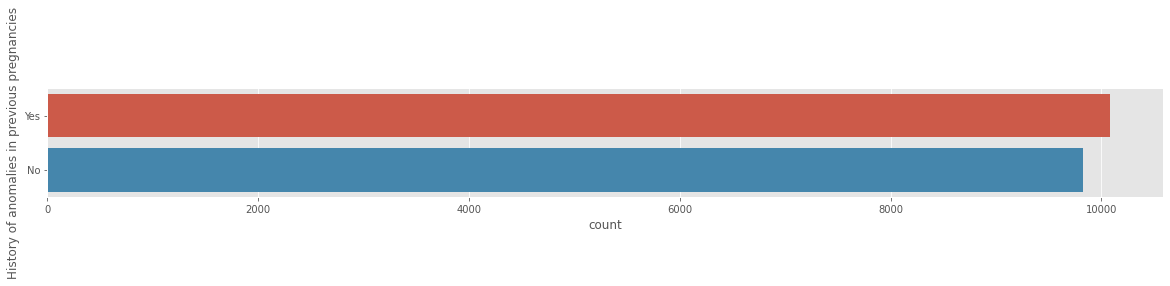

In [60]:
# Understanding Anomalies in Previous Pregnancies details
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "History of anomalies in previous pregnancies",data= train)

print(train["History of anomalies in previous pregnancies"].value_counts())

- Here we will replace the Missing Values with **No** assuming that the Patient has left that because there was No Anomalies.

#### FEATURE 23: No. of previous abortion
Description: Represents the Number of Abortions that a Mother had.

In [61]:
## Unique Categories
train["No. of previous abortion"].unique()

array([nan,  4.,  1.,  0.,  3.,  2.])

2.0    4117
4.0    4005
0.0    3964
1.0    3928
3.0    3907
Name: No. of previous abortion, dtype: int64


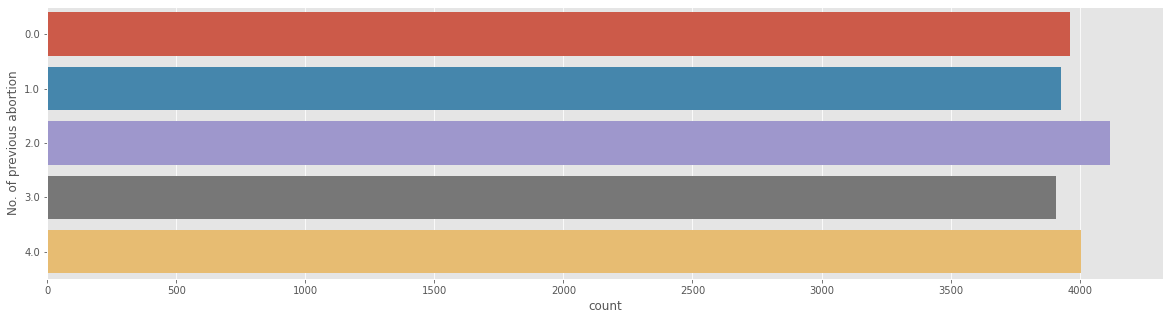

In [62]:
# Understanding Abortion details
fig = plt.figure(figsize=(20,5))
sns.countplot(y= "No. of previous abortion",data= train)

print(train["No. of previous abortion"].value_counts())

- Here we will replace the Missing Values with **0** assuming that the Patient has left that because they had done no Abortion.

#### FEATURE 24: Birth defects
Description: Represents whether a Patient has Birth Defects.

In [63]:
## Unique Categories
train["Birth defects"].unique()

array([nan, 'Multiple', 'Singular'], dtype=object)

Singular    9977
Multiple    9952
Name: Birth defects, dtype: int64


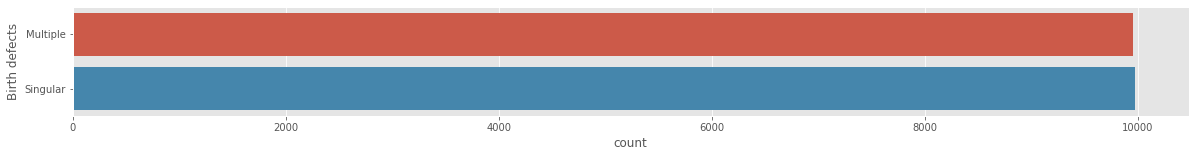

In [64]:
# Understanding Birth Defects details
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Birth defects",data= train)

print(train["Birth defects"].value_counts())

- By default we will assign the Missing Values as **Singular**. This is because of the assumption that I am making whereby assuming that the Patient has *single defect*.

#### FEATURE 25: White Blood cell count (thousand per microliter)
Description: Represents a Patient's White Blood Cell Count.

In [65]:
## Missing Values
train["White Blood cell count (thousand per microliter)"].isnull().any()

True

In [66]:
## Basic Statistics
train['White Blood cell count (thousand per microliter)'].describe()

count    19935.000000
mean         7.486224
std          2.653393
min          3.000000
25%          5.424703
50%          7.477132
75%          9.526152
max         12.000000
Name: White Blood cell count (thousand per microliter), dtype: float64

- Here we will deal with the Missing Values by filling them with the ***Average value (7.486224)***.

#### FEATURE 26: Blood test result
Description: Represents a Patient's Blood Test Results.

In [67]:
## Unique Categories
train["Blood test result"].unique()

array([nan, 'normal', 'inconclusive', 'slightly abnormal', 'abnormal'],
      dtype=object)

slightly abnormal    5128
normal               4954
inconclusive         4952
abnormal             4904
Name: Blood test result, dtype: int64


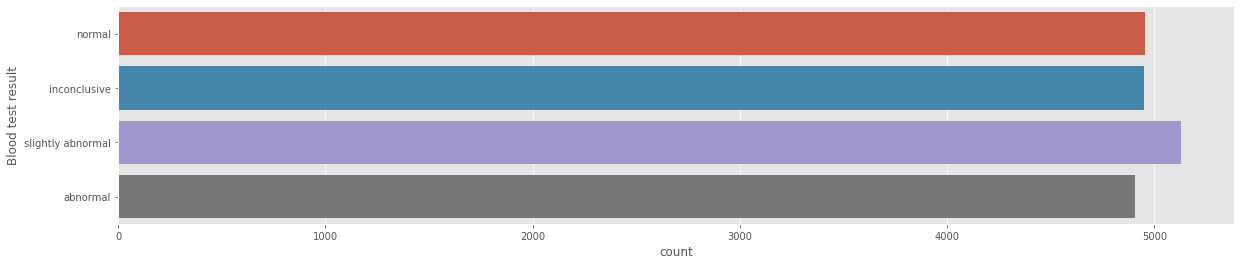

In [68]:
# Understanding Blood Test Result details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Blood test result",data= train)

print(train["Blood test result"].value_counts())

- We can fill in these Missing Values with the **Most Frequent** Category **(Slightly Abnormal)**.

#### FEATURE 27: Symptom 1 - Symptom 5
Description: Represents Different Types of Symptoms that a Patient had.

In [69]:
print(f"Uniqueness for Symptom 1 is: {train['Symptom 1'].unique()}")
print()
print(f"Uniqueness for Symptom 2 is: {train['Symptom 2'].unique()}")
print()
print(f"Uniqueness for Symptom 3 is: {train['Symptom 3'].unique()}")
print()
print(f"Uniqueness for Symptom 4 is: {train['Symptom 4'].unique()}")
print()
print(f"Uniqueness for Symptom 5 is: {train['Symptom 5'].unique()}")

Uniqueness for Symptom 1 is: [ 1.  0. nan]

Uniqueness for Symptom 2 is: [ 1. nan  0.]

Uniqueness for Symptom 3 is: [ 1.  0. nan]

Uniqueness for Symptom 4 is: [ 1.  0. nan]

Uniqueness for Symptom 5 is: [ 1.  0. nan]


In [70]:
print(f"Count for Symptom 1 is: {train['Symptom 1'].value_counts()}")
print()
print(f"Count for Symptom 2 is: {train['Symptom 2'].value_counts()}")
print()
print(f"Count for Symptom 3 is: {train['Symptom 3'].value_counts()}")
print()
print(f"Count for Symptom 4 is: {train['Symptom 4'].value_counts()}")
print()
print(f"Count for Symptom 5 is: {train['Symptom 5'].value_counts()}")

Count for Symptom 1 is: 1.0    11807
0.0     8121
Name: Symptom 1, dtype: int64

Count for Symptom 2 is: 1.0    10961
0.0     8900
Name: Symptom 2, dtype: int64

Count for Symptom 3 is: 1.0    10715
0.0     9267
Name: Symptom 3, dtype: int64

Count for Symptom 4 is: 0.0    10030
1.0     9940
Name: Symptom 4, dtype: int64

Count for Symptom 5 is: 0.0    10724
1.0     9206
Name: Symptom 5, dtype: int64


- We will assign the Missing Symptoms with the **Most Frequent Value**.

#### FEATURE 28: Genetic Disorder
Description: Represents the Genetic Disorder that a Patient has.

In [71]:
## Unique Categories
train["Genetic Disorder"].unique()

array(['Mitochondrial genetic inheritance disorders', nan,
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic Disorder, dtype: int64


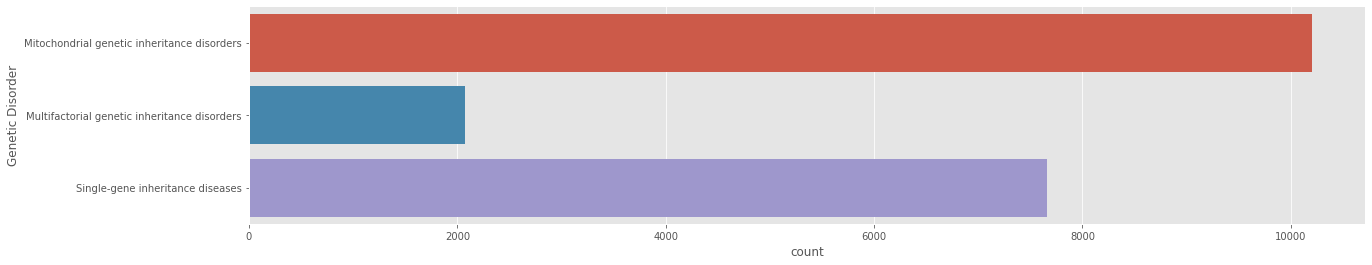

In [72]:
# Understanding Genetic Disorder details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Genetic Disorder",data= train)

print(train["Genetic Disorder"].value_counts())

#### FEATURE 29: Disorder Subclass
Description: Represents the Subclass of the Disorder.

In [73]:
## Unique Categories
train["Disorder Subclass"].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', nan, "Alzheimer's"],
      dtype=object)

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64


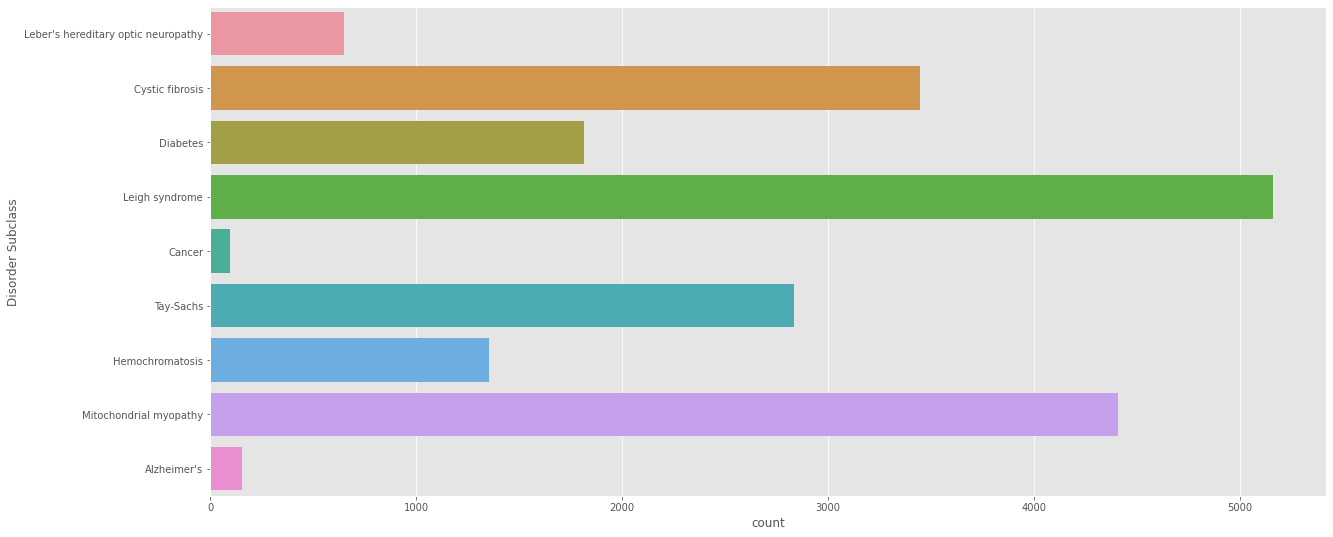

In [74]:
# Understanding Disorder Subclass details
fig = plt.figure(figsize=(20,9))
sns.countplot(y= "Disorder Subclass",data= train)

print(train["Disorder Subclass"].value_counts())

- An easy method that we can do here is remove the Missing Values that are present in both *Genetic Disorder* and *Disorder Subclass* Columns **(approx 280)**.